In [3]:
import pandas as pd

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [7]:
df=pd.read_csv('Alphabets_data.csv')

In [8]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [9]:
df.dtypes

,0
letter,object
xbox,int64
ybox,int64
width,int64
height,int64
onpix,int64
xbar,int64
ybar,int64
x2bar,int64
y2bar,int64


In [10]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [12]:

df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [13]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [14]:
# Split the dataset into features (x) and target (y)
x = df.drop('letter', axis=1)
y = df['letter']


In [15]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [16]:
y

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.values.reshape(-1, 1))
y_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y_onehot, test_size=0.2, random_state=42)

In [19]:
x_train

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
5894,4,7,5,5,4,6,7,3,7,11,8,9,3,8,4,8
3728,4,7,6,5,5,6,8,3,7,11,8,9,3,8,4,7
8958,3,5,4,3,3,7,8,5,5,7,7,6,5,9,2,6
7671,4,10,6,7,6,5,7,5,7,6,6,12,3,8,6,9
5999,4,10,6,8,4,8,11,2,3,4,10,9,3,11,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,5,11,4,6,3,7,7,4,3,9,6,7,3,10,8,7
11964,3,7,5,5,4,9,11,6,4,6,5,7,2,8,6,4
5390,3,4,6,3,2,9,6,2,8,10,3,7,2,7,3,9
860,3,8,4,6,2,7,8,0,8,14,6,6,0,8,1,7


In [21]:
x_val

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
10650,3,6,5,6,4,6,7,3,8,8,6,9,3,7,7,6
2041,4,11,6,8,8,7,8,3,5,6,6,10,6,11,7,5
8668,3,4,5,3,2,10,2,2,1,9,2,9,2,6,2,8
1114,2,4,2,3,2,7,7,5,7,7,6,8,2,8,5,10
13902,4,5,5,7,3,8,7,8,6,6,7,9,3,8,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,4,7,6,5,7,6,6,3,2,8,6,7,3,7,11,2
7442,2,1,3,3,1,6,12,3,6,8,11,7,1,11,1,7
9999,5,10,7,9,4,8,5,9,8,5,4,8,3,8,4,8
1870,4,5,5,7,5,10,11,5,4,5,8,8,5,10,9,5


In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [27]:
model =Sequential()
model.add(layers.InputLayer(input_shape=(x_train.shape[1],)))  # Input layer
model.add(layers.Dense(64, activation='relu'))                   # Hidden layer 1
model.add(layers.Dense(32, activation='relu'))                   # Hidden layer 2
model.add(layers.Dense(y_onehot.shape[1], activation='softmax'))  # Output layer

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2311 - loss: 2.8545 - val_accuracy: 0.6733 - val_loss: 1.2484
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6748 - loss: 1.1840 - val_accuracy: 0.7358 - val_loss: 0.9785
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7409 - loss: 0.9376 - val_accuracy: 0.7775 - val_loss: 0.8359
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7744 - loss: 0.7957 - val_accuracy: 0.7745 - val_loss: 0.7642
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7863 - loss: 0.7381 - val_accuracy: 0.8105 - val_loss: 0.6944
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.6788 - val_accuracy: 0.8155 - val_loss: 0.6430
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 0.6061 - val_accuracy: 0.8240 - val_loss: 0.5923
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.5691 - val_accuracy: 0.

In [30]:
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9093 - loss: 0.2676
Validation Accuracy: 0.9143


In [31]:
predictions = model.predict(X_val)  # Predict on validation set

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
predicted_classes = encoder.inverse_transform(predictions)  # Get class labels
print(predicted_classes)

[['X']
 ['L']
 ['A']
 ...
 ['Q']
 ['Y']
 ['Y']]


In [33]:
#Evaluation

In [35]:
import matplotlib.pyplot as plt

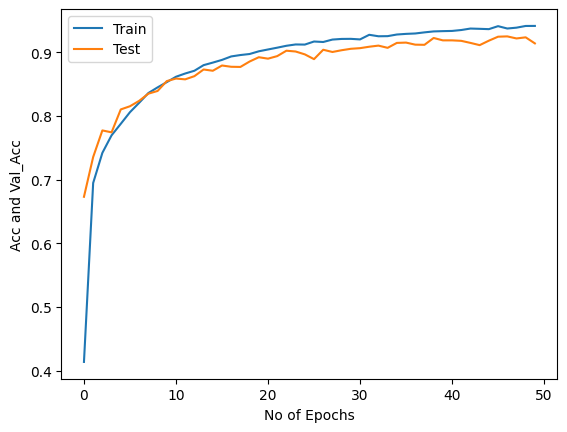

In [36]:
plt.plot(range(50),history.history['accuracy'],label='Train')
plt.plot(range(50),history.history['val_accuracy'],label='Test')
plt.legend(loc='best')
plt.xlabel('No of Epochs')
plt.ylabel('Acc and Val_Acc');

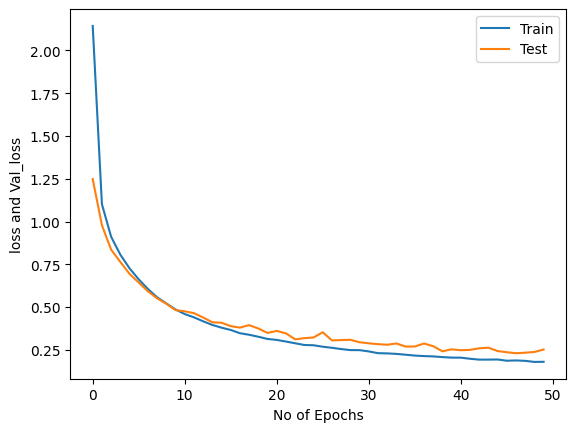

In [37]:
plt.plot(range(50),history.history['loss'],label='Train')
plt.plot(range(50),history.history['val_loss'],label='Test')
plt.legend(loc='best')
plt.xlabel('No of Epochs')
plt.ylabel('loss and Val_loss');



● Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning

    Learning Rate:

Default: Often set to a standard value (e.g., 0.01). This can be too high or too low, causing the model to converge slowly or overshoot minima.

Tuned: A well-adjusted learning rate can significantly accelerate convergence, allowing the model to reach optimal weights more effectively.

    Number of Layers and Neurons:

Default: May use a simple architecture (e.g., a few layers with a standard number of neurons).

Tuned: By experimenting with more layers or varying neuron counts, the model can learn more complex patterns, improving accuracy, especially in tasks with intricate relationships.

    Activation Functions:

Default: Typically employs common functions like ReLU or sigmoid.

Tuned: Choosing the right activation function can impact gradient flow. For instance, using Leaky ReLU or Swish may help mitigate issues like the vanishing gradient problem, leading to better performance.

    Optimizer Choice:

Default: Frequently defaults to Stochastic Gradient Descent (SGD).

Tuned: Using advanced optimizers like Adam or RMSprop can enhance convergence speed and stability, as they adapt learning rates based on gradients

    Epochs:

Default: Often a fixed number without consideration of convergence.

Tuned: By using early stopping based on validation performance, a tuned model can avoid overfitting while ensuring sufficient training